[View in Colaboratory](https://colab.research.google.com/github/marcelcerri/fun-o-Logistica/blob/master/Ajuste_de_uma_fun%C3%A7%C3%A3o_logistica.ipynb)

In [0]:
import numpy as np
from scipy.optimize import curve_fit
import io
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

#carregar o arquivo em csv
uploaded = files.upload()

Saving funcao_logistica.csv to funcao_logistica.csv


In [3]:
#verificação do upload
for fn in uploaded.keys():
  print('O arquivo "{name}" com tamanho de {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

O arquivo "funcao_logistica.csv" com tamanho de 233 bytes


In [0]:
#transformando o arquivo csv em data frame
calibracao_df = pd.read_csv(io.StringIO(uploaded['funcao_logistica.csv'].decode('utf-8')))

In [6]:
#impressão do arquivo em data frame
calibracao_df

,x,y
0,-7,0.035972
1,-6,0.064591
2,-5,0.114648
3,-4,0.199501
4,-3,0.335963
5,-2,0.537883
6,-1,0.802625
7,0,1.099668
8,1,1.379949
9,2,1.604368


In [0]:
#transformando data frame em vetor
calibracao_np = calibracao_df.values

In [8]:
#impressão do vetor
calibracao_np

array([[-7.        ,  0.03597242],
       [-6.        ,  0.06459093],
       [-5.        ,  0.11464835],
       [-4.        ,  0.19950098],
       [-3.        ,  0.33596323],
       [-2.        ,  0.53788284],
       [-1.        ,  0.80262468],
       [ 0.        ,  1.09966799],
       [ 1.        ,  1.37994896],
       [ 2.        ,  1.60436778],
       [ 3.        ,  1.76159416],
       [ 4.        ,  1.86172316],
       [ 5.        ,  1.92166855],
       [ 6.        ,  1.95623746],
       [ 7.        ,  1.97574313]])

In [9]:
#vetor do eixo x
x = calibracao_np[:,0]
print(x)

[-7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.]


In [10]:
#vetor do eixo y
y = calibracao_np[:,1]
print(y)

[0.03597242 0.06459093 0.11464835 0.19950098 0.33596323 0.53788284
 0.80262468 1.09966799 1.37994896 1.60436778 1.76159416 1.86172316
 1.92166855 1.95623746 1.97574313]


In [0]:
# Definição do modelo
def func(x, alfa, beta, teta):
  return teta / (1 + np.exp(-(alfa + beta *x))) 

In [0]:
# Chamada de curve_fit
popt, pcov = curve_fit(func, x, y, p0=(1,1,1))  
p1, p2, p3 = popt

In [16]:
# Impressão dos parâmetros ótimos
print("Optimal parameters are p1=%g, p2=%g, p3=%g" % (p1, p2, p3))

Optimal parameters are p1=0.2, p2=0.6, p3=2


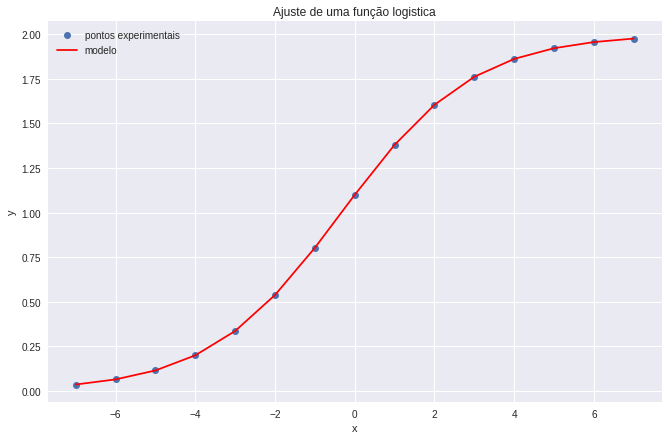

In [19]:
yfitted = func(x, *popt) 
#impressão dos dados experimentais e do modelo 
plt.plot(x, y, "o", label = "pontos experimentais")
plt.plot(x, yfitted, "-r", label = "modelo")
plt.xlabel("x")
plt.ylabel("y")
plt.rcParams['figure.figsize'] = (11,7)
plt.title("Ajuste de uma função logistica")
plt.legend()
plt.show()